# 主题：压力和精神质对每日消极情绪反应次数的影响

## 目录

## 1、什么是泊松MLM？ 可以解决什么问题？

## 2、如何建模？
## 哔站视频： https://www.bilibili.com/video/BV1UV411c7md/?spm_id_from=333.999.0.0&vd_source=6de003ac5dadef468504728c181eab42

# 什么是 Poisson Multilevel Model？

#### 首先我们知道基本的多层线性模型可以写成：

第一层

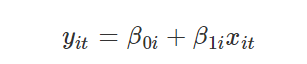

β1i 是个体 i 的 x 的效应，β0i 是个体 i 的截距水平

第二层

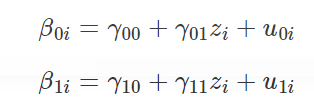

截距项被分为： γ01是个体i的z对截距项的影响，γ00是扣除z解释的效应后 i 的一般截距水平

斜率项被分为： γ11是个体i的z对斜率的影响，γ10是扣除z解释的系哦啊应后 i 的一般的斜率水平 

#### 更多详情请看上一节课， Poisson MLM 做了进一步的扩展




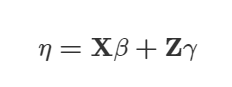

 η代表 fixed effect 和 random effect 的综合
 
 ##### 什么是 fixed effect ？上面 basic MLM 中 γ00 和 γ10 是 fixed effect。
 ##### 什么是 random effect ? 上面 basic MLM 中 u0i 和 u1i 是 random effect。
 
 
 ##### 链接函数——自变量与因变量的关系：
 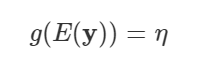
 
链接函数（link function），g(⋅)，链接函数代表预测变量η
和被预测变量 y 之间的关系。
 
 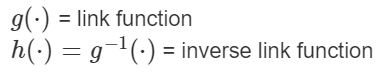

所以 E（y）可以表达为

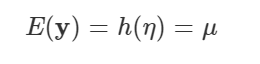

以上是广义线性模型眼中，事物的一般关系，之所以称为“广义”，是因为什么样的y都可以描述

##### 对于计数型的结果变量，我们认为事情发生满足泊松分布：

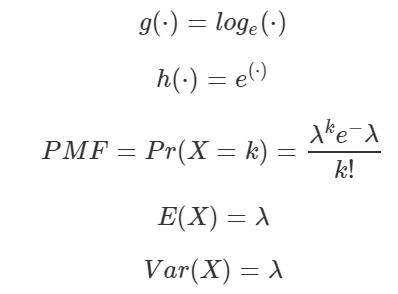

下面左图是正态分布（一般线性回归），右图是泊松分布（泊松回归）
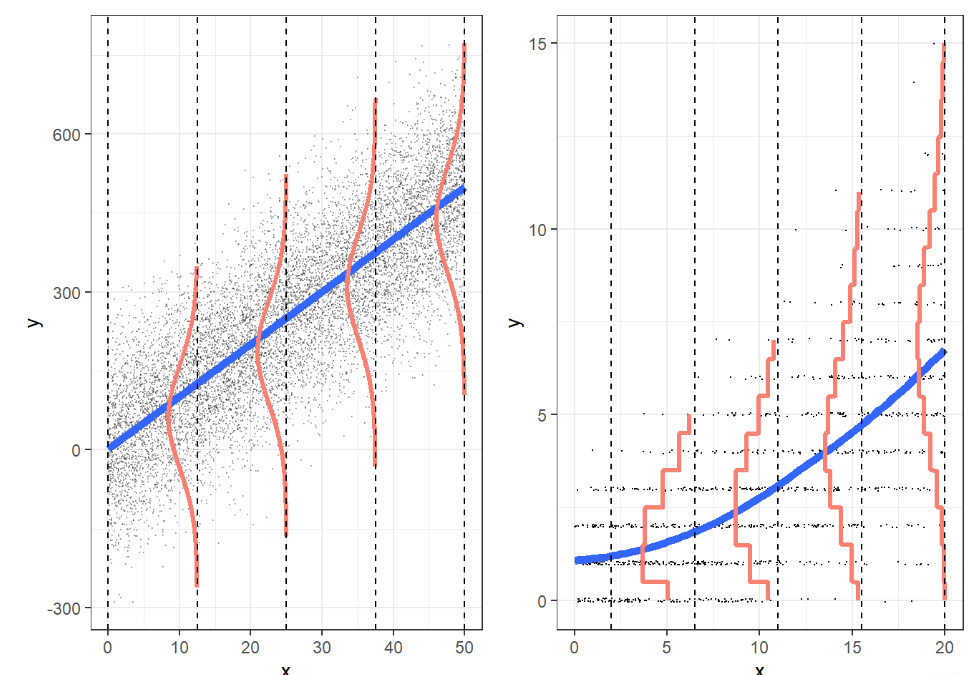

有了链接函数，有了PMF，借助极大似然估计，确定最大概率获得当前样本的值作为参数的估计值时的参数。

In [1]:
library(psych)   # 描述分析
library(ggplot2) # 数据可视化
library(lme4)    # 拟合多层线性模型

Warning message:
"程辑包'psych'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"

载入程辑包：'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"程辑包'lme4'是用R版本4.2.3 来建造的"
载入需要的程辑包：Matrix

Warning message:
"程辑包'Matrix'是用R版本4.2.3 来建造的"


In [2]:
# 读取数据
daily_long <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/data/daily_long.csv")

In [3]:
daily_long_new <- daily_long[c("id","day","negaffcount","bfi_n","stress_trait","stress_state")]

head(daily_long_new)

,id,day,negaffcount,bfi_n,stress_trait,stress_state
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,101,0,20,2,1.0625,0.4375
2,101,1,13,2,1.0625,0.1875
3,101,2,0,2,1.0625,-0.5625
4,101,3,3,2,1.0625,-0.0625
5,101,4,1,2,1.0625,0.1875
6,101,5,0,2,1.0625,0.1875


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 17 rows containing non-finite values (`stat_bin()`)."


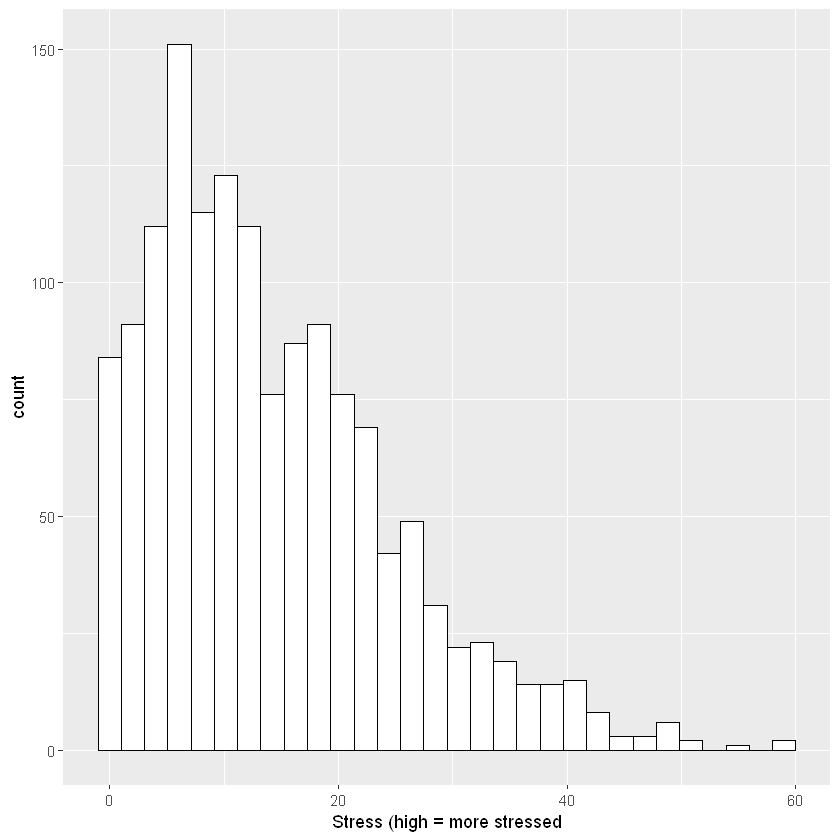

In [4]:
ggplot(data=daily_long_new, aes(x=negaffcount)) +
  geom_histogram(fill="white", color="black") +
  labs(x = "Stress (high = more stressed")

#### 我们的因变量， 消极情绪反应是一种计数数据（count variable），衡量一天有几次出现压力反应。

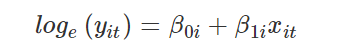



`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 5 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 74 rows containing missing values (`geom_smooth()`)."


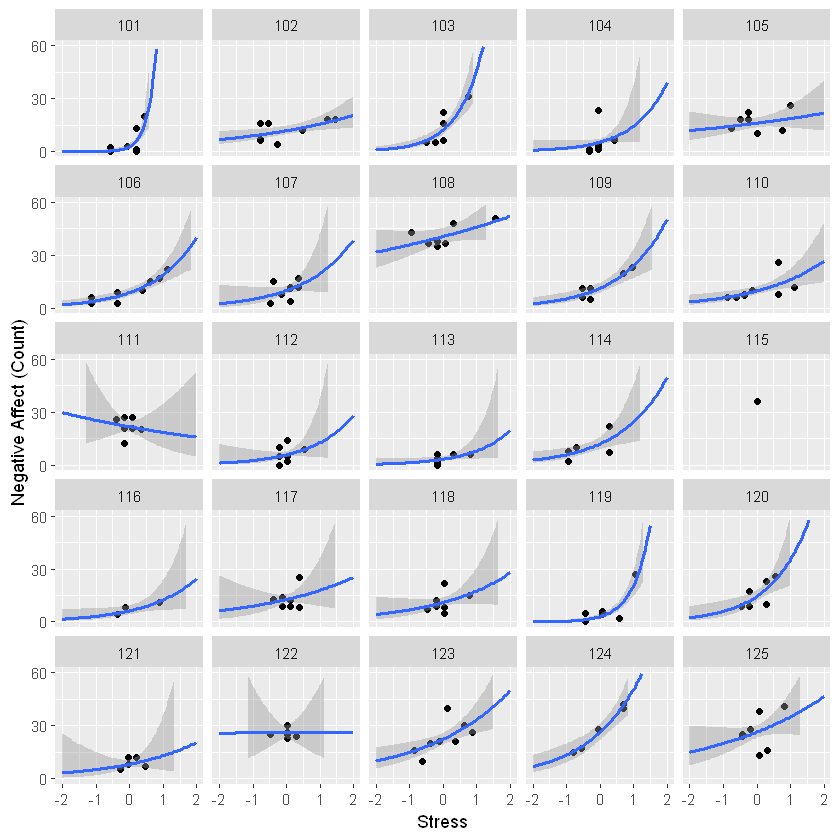

In [5]:
# 可视化
ggplot(data=daily_long_new[which(daily_long$id <= 125),], 
       aes(x=stress_state,y=negaffcount)) +
  geom_point() + #(position=position_jitter(h=.025)) + 
  stat_smooth(method="glm", method.args = list(family="poisson"), fullrange=TRUE) +
  xlab("Stress") + ylab("Negative Affect (Count)") + 
  scale_x_continuous(limits=c(-2,2),breaks=seq(-2,2,by=1)) + 
  scale_y_continuous(limits=c(0,60), breaks=c(0,30,60)) +
  facet_wrap( ~ id)

#### 使用 lme4 中的 glmer() 建模，glmer() 是 lme4 函数库中的函数

In [6]:
# most basic model
model0_fit <- glmer(formula = negaffcount ~ 1 + (1|id), 
              family="poisson",
              data=daily_long,
              na.action=na.exclude)
summary(model0_fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: negaffcount ~ 1 + (1 | id)
   Data: daily_long

     AIC      BIC   logLik deviance df.resid 
 12556.4  12567.0  -6276.2  12552.4     1439 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.8837 -1.4131 -0.3372  1.0990  8.9100 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 0.3014   0.549   
Number of obs: 1441, groups:  id, 190

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.55757    0.04065   62.91   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [7]:
exp(2.55757)

[1] 12.90442

#### 这里输出的结果 log(negaffcountit) ，Fixed effect = 2.56 代表log(negaffcountit) 一般水平

增加 stress_trait 和 stress_level . _state
 

In [8]:
#simple model 
model1_fit <- glmer(formula = negaffcount ~ 1 + stress_trait_c + 
                      stress_state + stress_state:stress_trait_c + 
                      (1 + stress_state|id), 
                    family="poisson",
                    data=daily_long,
                    na.action=na.exclude)
summary(model1_fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
negaffcount ~ 1 + stress_trait_c + stress_state + stress_state:stress_trait_c +  
    (1 + stress_state | id)
   Data: daily_long

     AIC      BIC   logLik deviance df.resid 
 10558.8  10595.7  -5272.4  10544.8     1431 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6742 -1.0652 -0.1746  0.8470  7.3430 

Random effects:
 Groups Name         Variance Std.Dev. Corr 
 id     (Intercept)  0.1591   0.3989        
        stress_state 0.1500   0.3874   -0.34
Number of obs: 1438, groups:  id, 190

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  2.50209    0.03018  82.898  < 2e-16 ***
stress_trait_c               0.83509    0.06396  13.057  < 2e-16 ***
stress_state                 0.55984    0.03469  16.137  < 2e-16 ***
stress_trait_c:stress_state -0.29854    0.07564  -3.947 7.91e-0

#### 同理，γ10

In [9]:
exp(0.55983)

[1] 1.750375

#### 这意味着一般来讲，daily stress 提升 1 个单位， negative affect 提升1.75个单位


#### 接下来估计：链接函数结果（link scale，就是log odds），估计response结果（就是 count）


In [12]:
# 估计所有人的结果
daily_long$pred_m1log <- predict(model1_fit, type="link") # 返回log(effect)
daily_long$pred_m1original <- predict(model1_fit, type="response") # 返回effect

head(daily_long$pred_m1log)
head(daily_long$pred_m1original)

[1] 2.1972983 1.8362783 0.7532186 1.4752584 1.8362783 1.8362783

[1] 9.000663 6.273148 2.123825 4.372165 6.273148 6.273148

In [14]:
# stress_trait为0时的
newdata <- daily_long
newdata$stress_trait_c <- 0

head(newdata)

,id,day,negaff,pss,negaffcount,stress,bfi_n,stress_trait,bfi_n_c,stress_trait_c,stress_state,pred_m1log,pred_m1original
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,0,3.0,2.50,20,1.50,2,1.0625,-0.9815789,0,0.4375,2.1972983,9.000663
2,101,1,2.3,2.75,13,1.25,2,1.0625,-0.9815789,0,0.1875,1.8362783,6.273148
3,101,2,1.0,3.50,0,0.50,2,1.0625,-0.9815789,0,-0.5625,0.7532186,2.123825
4,101,3,1.3,3.00,3,1.00,2,1.0625,-0.9815789,0,-0.0625,1.4752584,4.372165
5,101,4,1.1,2.75,1,1.25,2,1.0625,-0.9815789,0,0.1875,1.8362783,6.273148
6,101,5,1.0,2.75,0,1.25,2,1.0625,-0.9815789,0,0.1875,1.8362783,6.273148


In [16]:
# 估计所有人的结果得分

daily_long$proto_m1log <- predict(model1_fit, newdata, type="link", re.form=~0)
daily_long$proto_m1original <- predict(model1_fit, newdata, type="response", re.form=~0)

head(daily_long$proto_m1log) 

head(daily_long$proto_m1original)

[1] 2.747020 2.607060 2.187183 2.467101 2.607060 2.607060

[1] 15.596082 13.559135  8.910076 11.788226 13.559135 13.559135

#### 绘制个体内效应

Warning message:
"Removed 16 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 13 rows containing missing values (`geom_point()`)."


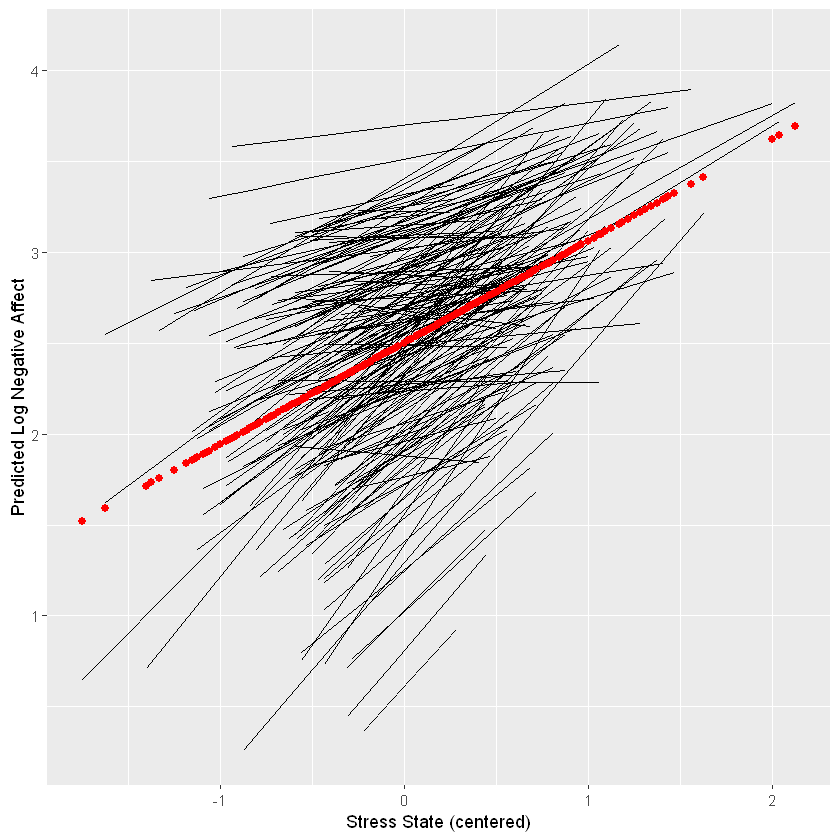

In [17]:
#Log scale predictions
ggplot(data = daily_long, aes(x = stress_state, y = pred_m1log, group = id)) +
  geom_line(color="black") +
  geom_point(aes(x = stress_state, y = proto_m1log), color="red",size=2) + 
  xlab("Stress State (centered)") + ylab("Predicted Log Negative Affect") 

Warning message:
"Removed 16 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 13 rows containing missing values (`geom_point()`)."


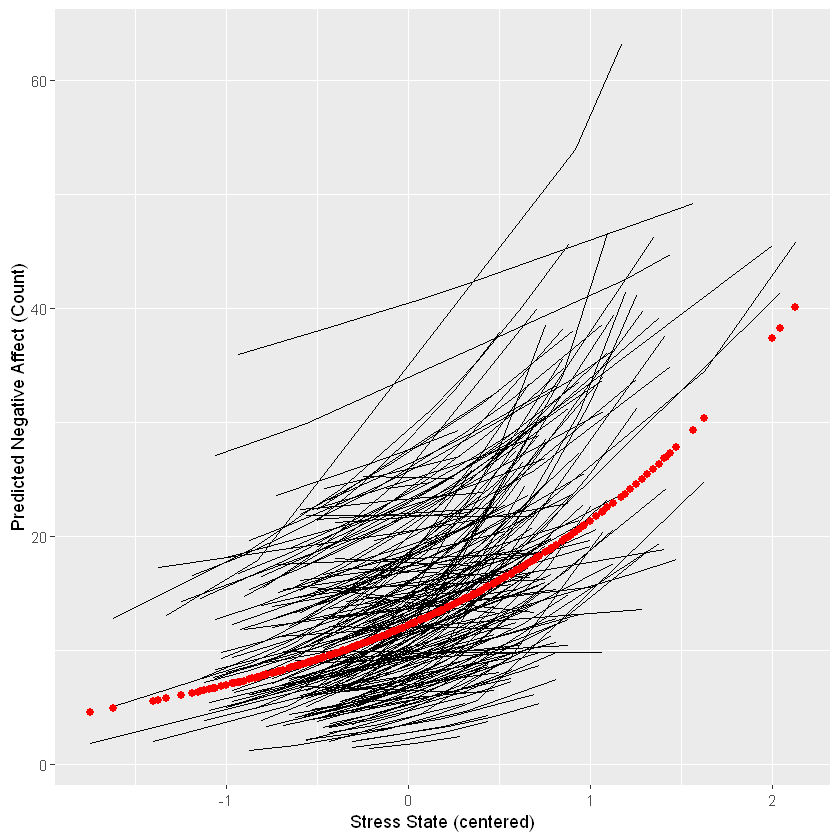

In [18]:
#Count scale predictions
ggplot(data = daily_long, aes(x = stress_state, y = pred_m1original, group = id)) +
  geom_line(color="black") +
  geom_point(aes(x = stress_state, y = proto_m1original), color="red",size=2) + 
  xlab("Stress State (centered)") + ylab("Predicted Negative Affect (Count)") 